In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker as mpl

In [2]:
# objective function
# returns total profit in dollars given amounts of type X and type Y ventilators
def profit(type_X: int, type_Y: int) -> float:
    return 25 * type_X + 30 * type_Y    

# calculate profit matrix
type_y = np.linspace(0, 4000, 41)
type_x = np.linspace(0, 6000, 61)

profit_matrix = np.zeros((41, 61))
for i, y in enumerate(type_y):
    for j, x in enumerate(type_x):
        profit_matrix[i, j] = profit(x, y)

optimal_profit = 192000
optimal_type_x = 6000
optimal_type_y = 1400

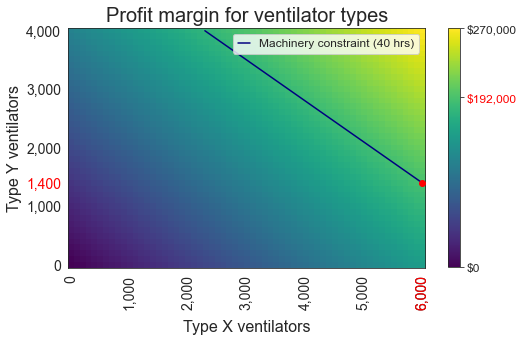

In [3]:
# visualize optimal solution
sns.set_style("white")

plt.figure(figsize=(8, 8))
cax = plt.imshow(profit_matrix, origin='lower', cmap='viridis')

plt.xlabel('Type X ventilators', fontsize=16, labelpad=10)
plt.xticks(np.linspace(0, 60, 7), np.linspace(0, 6000, 7).astype(int), rotation=90)
plt.xticks(list(plt.xticks()[0])+[optimal_type_x/100],fontsize=14)
plt.gca().axes.set_xticklabels(['0', '1,000', '2,000', '3,000', '4,000', '5,000', '6,000', '{:,}'.format(optimal_type_x)])
plt.gca().axes.get_xticklabels()[7].set_color("red")

plt.ylabel('Type Y ventilators', fontsize=16)
plt.yticks(np.linspace(0, 40, 5), np.linspace(0, 4000, 5).astype(int))
plt.yticks(list(plt.yticks()[0])+[optimal_type_y/100],fontsize=14)
plt.gca().axes.set_yticklabels(['0', '1,000', '2,000', '3,000', '4,000', '{:,}'.format(optimal_type_y)])
plt.gca().axes.get_yticklabels()[5].set_color("red")

y = np.array([14, 40])
plt.plot(200 * (0.4 - ((1/140)*y)), y, c='navy',label='Machinery constraint (40 hrs)')
plt.scatter(optimal_type_x/100, optimal_type_y/100, c='red', zorder=10)

cbar=plt.colorbar(cax, shrink=0.55, ticks=[0, optimal_profit, 270000])
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_yticklabels(['$0', '$'+'{:,}'.format(optimal_profit), '$270,000'])
cbar.ax.get_yticklabels()[1].set_color("red")

plt.title("Profit margin for ventilator types", fontsize=20)
do_not_print = plt.legend(loc='upper right',fontsize='12',handlelength=1)